In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


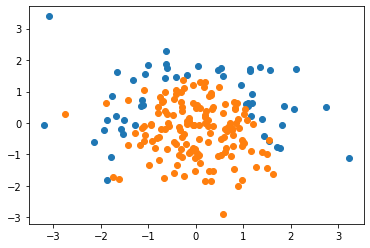

In [2]:
# 模拟数据集
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')
for _ in range(20):
  y[np.random.randint(200) ]=1

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
# 咱们先顶一个一个函数来画决策边界
def plot_decision_boundary(model, axis):
  
    s1 = np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100))
    s2 = np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)) 
    x0, x1 = np.meshgrid(
        s1, s2
    )
    r1 = x0.ravel()
    r2 = x1.ravel()
    X_new = np.c_[r1, r2]
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#ef9a9a', '#fff59d', '#90caf9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


In [5]:
# 逻辑回归
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print(log_reg.score(X_test,y_test))

0.8


<ipython-input-4-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


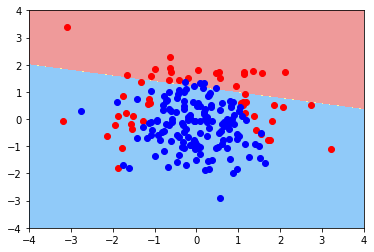

In [6]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [7]:
# 多项式逻辑回归以及模型正则化
def PolynomialLogisticRegression(degree):
  return Pipeline([
    ('ploy',PolynomialFeatures(degree = degree)),
    ('std_scaler',StandardScaler()),
    ('log_reg',LogisticRegression())
  ])

In [8]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train,y_train)
poly_log_reg.score(X_train,y_train)

0.9

In [9]:
poly_log_reg.score(X_test,y_test)

0.9

<ipython-input-4-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


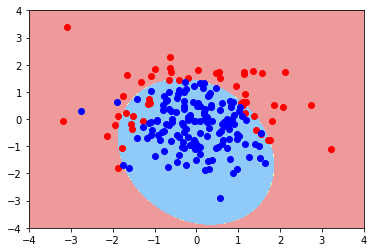

In [10]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

<ipython-input-4-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


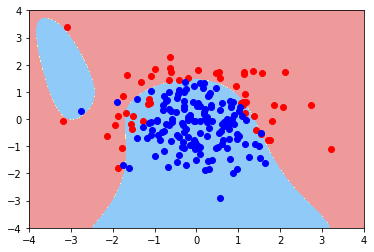

In [12]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train,y_train)
poly_log_reg2.score(X_train,y_train)

plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [13]:
# 多项式逻辑回归以及模型正则化
def PolynomialLogisticRegression(degree, C):
  return Pipeline([
    ('ploy',PolynomialFeatures(degree = degree)),
    ('std_scaler',StandardScaler()),
    ('log_reg',LogisticRegression(C=C))
  ])

<ipython-input-4-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


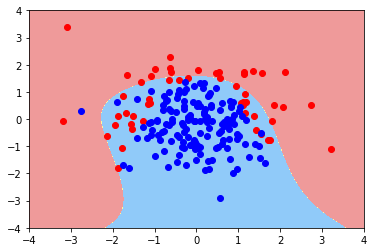

In [14]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train,y_train)

plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [15]:
poly_log_reg3.score(X_train,y_train)

0.8533333333333334

<ipython-input-4-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


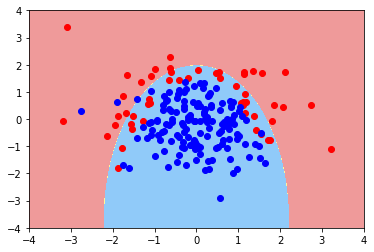

In [20]:
# 多项式逻辑回归以及模型正则化
def PolynomialLogisticRegression(degree, C, penalty='none'):
  return Pipeline([
    ('ploy',PolynomialFeatures(degree = degree)),
    ('std_scaler',StandardScaler()),
    ('log_reg',LogisticRegression(C=C, penalty=penalty, solver='liblinear'))
  ])
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train,y_train)

plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

<ipython-input-4-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


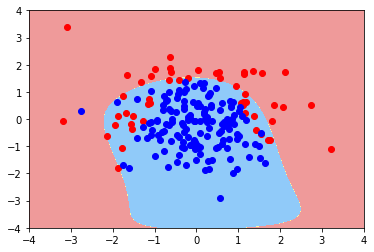

In [21]:
# 多项式逻辑回归以及模型正则化
def PolynomialLogisticRegression(degree, C, penalty='none'):
  return Pipeline([
    ('ploy',PolynomialFeatures(degree = degree)),
    ('std_scaler',StandardScaler()),
    ('log_reg',LogisticRegression(C=C, penalty=penalty, solver='liblinear'))
  ])
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l2')
poly_log_reg4.fit(X_train,y_train)

plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()